# 20 Random Stocks Investment Strategy

## Abstract

When we passively long-term invest, we prefer using well-established ETFs. However there might be circumstances when one might want to avoid using ETFs for some reason, however, still can purchase individual stocks.

Here I want to show that we do not have reproduce index of the world market to emulate its growth. It is actually enough to pick 20 *random* companies and invest the same amount of money into each of them, so that the risk of underperforming is less than 4% over a 8-year period. By underperforming we mean underperforming the inflation.

## Plan

- Get data
  - Get the last report about current companies traded at Nasdaq and their capitalizations
  - Get the historical data about stock prices for the given companies
- Filter companies
  - Accept only the last 20 years, 2002-2022
  - Accept only companies with IPO year < 2000
- Build Nasdaq index
  - Given the current market caps and the change of prices, compute the market share by the time of investment
- Analyze the data
  - Take three investment periods: 0.5, 3, 8 years
  - Take four strategies
    - Nasdaq Index - amount of shares proportionate to market cap for all companies
    - Uniform distribution - the same amount of money into each available company
    - Uniform partial distribution 20 - the same amount of money itno each of **20 random** companies
    - Uniform partial distribution 5 - the same amount of money into each of **5 random** companies
  - Move this window over the last 20 years
  - For each window's position and for each strategy
    - "Invest" $ 1000 into stocks in the beginning of this window
    - Fix the profits by the end, measure how much it increased
    - The result is a number ∈ [0; +inf) which is the increase of the value of our portfolio over the selected period of time
  - Pool all these numbers so that we have 12 sets: a set of numbers for each period for each strategy
    - To compute the annual growth we
      - Exclude 1/3 of outliers
      - Compute the *geometric mean* of these numbers
    - To compute the underperformance risk we
      - Assume inflation = **1.03**
      - Compute the share of annual increases which are *lower* than the inflation. This share is that risk

## Results

| Strategy    | Rel. 1/2 year | Rel. 3 years | Rel. 8 years | Growth  |
|:-----------:|:---------|:--------|:--------|:---------|
| Nq 400      | .668     | .789    | .958    | .10-.13  |
| U 400       | .692     | .837    | 1.0     | .10-.14  |
| UP 20       | .679     | .799    | .965    | .10-.13  |
| UP 5        | .617     | .716    | .826    | .09-.13  |

- *Reliability (rel.)* - the probability that the given strategy will result in portfolio worth less in given number of years than it was with the inflation adjusted.
- *Nq 400* - the Nasdaq index over 400 shares
- *U 400* - uniform investing into 400 shares
- *U 20* - uniform investing into 20 shares
- *U 5* - uniform investing into 5 shares

## Problems

1. We did not take into account companies which went bankrupt. For both index and uniform investing.
2. There is no balancing in the index, and new IPO companies are not taken into the account
3. Only the last 20 years are analyzed

## Conclusion

It *seems* like 20 random stocks strategy may work in real world, and its risks are comparable to the risks of index ETFs. However, I cannot conclude this confidently given all the problems with the research.

In [4]:
import pandas as pd
import yfinance as yf

Install [yfinance](https://github.com/ranaroussi/yfinance)

In [ ]:
# !pip install yfinance --upgrade

Link to the ticker list: http://www.nasdaq.com/screening/companies-by-name.aspx?letter=0&exchange=nasdaq&render=download

In [5]:
ticker_info = pd.read_csv("../nasdaq_screener_1652817332355.csv", sep=",")
ticker_info

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$123.045,2.7450,2.282%,3.692745e+10,United States,1999.0,1475402,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$63.68,3.4000,5.64%,1.174569e+10,NaN,2016.0,4906918,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.80,0.0100,0.102%,1.225000e+09,NaN,2021.0,123113,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.09,0.0800,7.921%,3.444246e+07,China,NaN,9454,Miscellaneous,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$9.84,0.0000,0.00%,2.037815e+08,United States,2021.0,758,Finance,Diversified Financial Service
...,...,...,...,...,...,...,...,...,...,...,...
8380,ZWS,Zurn Water Solutions Corporation Common Stock,$28.065,0.5050,1.832%,3.535279e+09,United States,2012.0,584857,Public Utilities,Environmental Services
8381,ZY,Zymergen Inc. Common Stock,$1.42,-0.0800,-5.333%,1.464351e+08,United States,2021.0,1346483,Basic Industries,Industrial Specialties
8382,ZYME,Zymeworks Inc. Common Shares,$5.915,0.5750,10.768%,3.417167e+08,Canada,2017.0,1785364,NaN,NaN
8383,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.0209,0.0909,9.774%,4.453314e+07,United States,2015.0,341906,Health Care,Biotechnology: Pharmaceutical Preparations


In [413]:
old_companies = ticker_info[ticker_info["IPO Year"] < 2000]
old_companies

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$123.045,2.7450,2.282%,3.692745e+10,United States,1999.0,1475402,Capital Goods,Electrical Products
20,AAPL,Apple Inc. Common Stock,$149.3408,3.8008,2.612%,2.589172e+12,United States,1980.0,61494093,Technology,Computer Manufacturing
30,ABCB,Ameris Bancorp Common Stock,$44.33,1.8800,4.429%,3.078088e+09,United States,1994.0,157730,Finance,Major Banks
117,ACU,Acme United Corporation. Common Stock,$33.21,0.7100,2.185%,1.169207e+08,United States,1988.0,4082,Consumer Durables,Home Furnishings
126,ADBE,Adobe Inc. Common Stock,$410.54,7.6800,1.906%,1.939802e+11,United States,1986.0,1854033,Technology,Computer Software: Prepackaged Software
...,...,...,...,...,...,...,...,...,...,...,...
8315,YPF,YPF Sociedad Anonima Common Stock,$4.475,0.0550,1.244%,1.760075e+09,Argentina,1993.0,1191749,Energy,Integrated oil Companies
8328,ZBRA,Zebra Technologies Corporation Class A Common ...,$346.62,17.2900,5.25%,1.820234e+10,United States,1991.0,284197,Technology,Computer peripheral equipment
8338,ZEUS,Olympic Steel Inc. Common Stock,$33.485,1.6150,5.067%,3.726101e+08,United States,1994.0,47725,Basic Industries,Steel/Iron Ore
8361,ZNH,China Southern Airlines Company Limited Common...,$25.50,0.5000,2.00%,8.643708e+09,China,1997.0,23008,Transportation,Air Freight/Delivery Services


In [414]:
tickers_as_one = " ".join(filter(lambda x: "^" not in x, old_companies["Symbol"]))

In [415]:
tickers_as_one[:100]

'A AAPL ABCB ACU ADBE ADTN AEHR AEIS AHPI AIV AKAM ALKS ALOT AMAT AMGN AMKR AMSC AMWD AMZN ANSS ARLP '

In [416]:
all_nasdaq_2000 = yf.download(tickers_as_one, period="max")
# all_nasdaq = pd.read_csv("../all_history_all_nasdaq.csv", )

[*********************100%***********************]  480 of 480 completed


In [418]:
all_nasdaq_2000.to_csv("../all_history_2000IPO_caps_nasdaq.csv")
all_nasdaq_2000

Adj Close                                                \
                     A        AAPL       ABCB        ACU        ADBE   
Date                                                                   
1973-02-21         NaN         NaN        NaN        NaN         NaN   
1973-02-22         NaN         NaN        NaN        NaN         NaN   
1973-02-23         NaN         NaN        NaN        NaN         NaN   
1973-02-26         NaN         NaN        NaN        NaN         NaN   
1973-02-27         NaN         NaN        NaN        NaN         NaN   
...                ...         ...        ...        ...         ...   
2022-05-12  116.129997  142.559998  42.500000  31.799999  388.489990   
2022-05-13  119.379997  147.110001  42.779999  32.410000  405.450012   
2022-05-16  120.300003  145.539993  42.450001  32.500000  402.859985   
2022-05-17  123.080002  149.240005  44.330002  32.509998  409.649994   
2022-05-18  121.010002  141.559998  42.650002  32.779999  398.260010   

                                                    ...    Volume           \
                 ADTN  AEHR       AEIS  AHPI   AIV  ...       WNC     WRLD   
Date                                                ...                      
1973-02-21        NaN   NaN        NaN   NaN   NaN  ...       NaN      NaN   
1973-02-22        NaN   NaN        NaN   NaN   NaN  ...       NaN      NaN   
1973-02-23        NaN   NaN        NaN   NaN   NaN  ...       NaN      NaN   
1973-02-26        NaN   NaN        NaN   NaN   NaN  ...       NaN      NaN   
1973-02-27        NaN   NaN        NaN   NaN   NaN  ...       NaN      NaN   
...               ...   ...        ...   ...   ...  ...       ...      ...   
2022-05-12  17.250000  7.42  75.910004  1.89  5.61  ...  311000.0  44300.0   
2022-05-13  17.580000  8.03  79.519997  1.91  5.82  ...  392500.0  34400.0   
2022-05-16  17.270000  7.78  77.379997  1.73  5.83  ...  193000.0  46200.0   
2022-05-17  18.480000  8.40  80.879997  1.86  6.13  ...  412700.0  37200.0   
2022-05-18  17.790001  8.03  77.980003  1.87  6.03  ...  222443.0  24010.0   

                                                                          \
                 WTS     XOMA       XRAY        YPF       ZBRA      ZEUS   
Date                                                                       
1973-02-21       NaN      NaN        NaN        NaN        NaN       NaN   
1973-02-22       NaN      NaN        NaN        NaN        NaN       NaN   
1973-02-23       NaN      NaN        NaN        NaN        NaN       NaN   
1973-02-26       NaN      NaN        NaN        NaN        NaN       NaN   
1973-02-27       NaN      NaN        NaN        NaN        NaN       NaN   
...              ...      ...        ...        ...        ...       ...   
2022-05-12  162800.0  36300.0  4186200.0  2035400.0  1076600.0   82200.0   
2022-05-13  129700.0  61000.0  2041500.0  1491100.0   627700.0   66300.0   
2022-05-16  103900.0  43700.0  1826700.0  2631700.0   394900.0   70500.0   
2022-05-17  123700.0  39800.0  1592800.0  1405100.0   456500.0   74600.0   
2022-05-18   65184.0  32318.0   760620.0   860619.0   274698.0  133969.0   

                              
                ZNH      ZTR  
Date                          
1973-02-21      NaN      NaN  
1973-02-22      NaN      NaN  
1973-02-23      NaN      NaN  
1973-02-26      NaN      NaN  
1973-02-27      NaN      NaN  
...             ...      ...  
2022-05-12  30500.0  67700.0  
2022-05-13  22600.0  60400.0  
2022-05-16  18400.0  72400.0  
2022-05-17  26900.0  43700.0  
2022-05-18   5808.0  49206.0  

[12427 rows x 2880 columns]

In [37]:
# all_nasdaq.to_csv("../all_history_all_nasdaq.csv")

In [39]:
ticker_info[0:5]

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$123.045,2.745,2.282%,3.692745e+10,United States,1999.0,1475402,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$63.68,3.400,5.64%,1.174569e+10,NaN,2016.0,4906918,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.80,0.010,0.102%,1.225000e+09,NaN,2021.0,123113,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.09,0.080,7.921%,3.444246e+07,China,NaN,9454,Miscellaneous,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$9.84,0.000,0.00%,2.037815e+08,United States,2021.0,758,Finance,Diversified Financial Service


In [461]:
companies_to_drop_2010 = [ "CVT", "LAND", "ATAI", "MDH", "THRX", "LJPC" ]
companies_to_drop_2000 = companies_to_drop_2010 + ["CLM", "CSII", "CTIB", "CTIC"]

In [462]:
COUNT = 1000
tickers_largest_caps = old_companies.sort_values("Market Cap", ascending=False)[:COUNT]
index_large = tickers_largest_caps[:COUNT]
index_large = index_large.loc[index_large["Symbol"].map(lambda x: x not in companies_to_drop_2000)]
index_large

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
20,AAPL,Apple Inc. Common Stock,$149.3408,3.8008,2.612%,2.589172e+12,United States,1980.0,61494093,Technology,Computer Manufacturing
5070,MSFT,Microsoft Corporation Common Stock,$266.37,4.8700,1.862%,1.992190e+12,United States,1986.0,21699478,Technology,Computer Software: Prepackaged Software
469,AMZN,Amazon.com Inc. Common Stock,$2301.35,85.1400,3.842%,1.170744e+12,United States,1997.0,3180182,Consumer Services,Catalog/Specialty Distribution
7622,TSM,Taiwan Semiconductor Manufacturing Company Ltd.,$93.3825,2.9725,3.288%,4.842628e+11,Taiwan,1997.0,5526460,Technology,Semiconductors
5480,NVDA,NVIDIA Corporation Common Stock,$181.84,9.2000,5.329%,4.553300e+11,United States,1999.0,51524176,Technology,Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...
3951,IMH,Impac Mortgage Holdings Inc. Common Stock,$0.70,0.0000,0.00%,1.501862e+07,United States,1997.0,19760,Finance,Finance: Consumer Services
4092,ISIG,Insignia Systems Inc. Common Stock,$7.3567,0.1167,1.612%,1.314124e+07,United States,1991.0,9672,Technology,Advertising
4909,MIND,MIND Technology Inc. Common Stock (DE),$0.9402,0.0171,1.852%,1.295041e+07,United States,1994.0,17151,Capital Goods,Industrial Machinery/Components
1717,CLWT,Euro Tech Holdings Company Limited Common Stock,$1.5301,0.0101,0.664%,1.183094e+07,Hong Kong,1997.0,2687,Consumer Durables,Diversified Electronic Products


In [463]:
sum_cap = sum(index_large["Market Cap"])
sum_cap

11220327059039.0

In [464]:
props = pd.concat([index_large["Symbol"], index_large["Market Cap"].apply(lambda x: x / sum_cap)], axis=1, keys=["Symbol", "Share"])
props

,Symbol,Share
20,AAPL,2.307573e-01
5070,MSFT,1.775519e-01
469,AMZN,1.043413e-01
7622,TSM,4.315942e-02
5480,NVDA,4.058081e-02
...,...,...
3951,IMH,1.338519e-06
4092,ISIG,1.171200e-06
4909,MIND,1.154192e-06
1717,CLWT,1.054421e-06


### Get the stock value history of the big companies for the last 20 years

In [465]:
last_20_years = all_nasdaq_2000[-20 * 365 * 5 // 7:]
avg_price = (last_20_years["Close"] + last_20_years["Open"]) / 2
stock_history_big_index = avg_price.filter(index_large["Symbol"])
stock_history_big_index

,AAPL,MSFT,AMZN,TSM,NVDA,ASML,CSCO,ADBE,ORCL,UPS,...,DAIO,TRIB,TAIT,RMTI,ELTK,IMH,ISIG,MIND,CLWT,AHPI
Date,,,,,,,,,,,,,,,,,,,,,
2001-09-05,0.328482,28.480000,8.155000,8.654770,3.317708,18.613125,15.310000,16.097500,12.160000,55.309999,...,2.25000,5.8600,1.75000,12.705,13.650,69.500000,50.29500,4.540,5.046704,6.700
2001-09-06,0.322500,28.145000,7.995000,8.474746,3.252500,17.167500,14.470000,15.682500,11.370000,54.849998,...,2.25000,5.9400,1.67500,13.365,13.100,68.750000,51.20500,4.420,4.029304,6.650
2001-09-07,0.310536,27.877501,8.235000,8.678547,3.208750,16.903125,14.305000,15.475000,10.965000,54.185001,...,2.22000,5.9800,1.66500,11.880,10.800,65.750000,49.87500,4.400,4.029304,7.000
2001-09-10,0.306875,28.125000,8.515000,8.698927,3.190000,16.723125,14.260000,16.185000,11.175000,53.349998,...,2.18000,5.8200,1.73000,10.780,11.075,62.549999,49.45500,4.405,4.281136,6.600
2001-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,142.665001,256.520004,2096.805054,86.955002,161.970001,518.529999,48.460001,380.944992,70.805000,177.394997,...,3.06000,1.1650,4.11000,2.970,3.695,0.690000,7.34500,0.935,1.305000,1.880
2022-05-13,145.849998,259.235001,2221.239990,89.915001,172.470001,544.440002,49.135000,400.960007,71.064999,177.449997,...,3.10500,1.1600,3.85000,1.970,3.855,0.695000,7.28500,0.925,1.355000,1.890
2022-05-16,145.544998,260.729996,2239.104980,90.140003,173.864998,534.100006,49.330000,401.299988,70.200001,178.795006,...,3.03500,1.1750,3.70000,2.060,3.795,0.690000,7.17500,0.935,1.465000,1.830


### What are the prices by the start date?

In [467]:
date_from = "2002-01-22"
date_to = "2022-05-17"

price_from = stock_history_big_index.loc[date_from]
price_to = stock_history_big_index.loc[date_to]

In [468]:
price_from

AAPL     0.393661
MSFT    32.767500
AMZN    12.670000
TSM     12.119396
NVDA     5.275000
          ...    
IMH     82.200001
ISIG    58.975000
MIND     4.580000
CLWT     4.373810
AHPI     7.200000
Name: 2002-01-22 00:00:00, Length: 473, dtype: float64

In [469]:
price_to

AAPL     149.050003
MSFT     266.464996
AMZN    2286.435059
TSM       93.310001
NVDA     181.255005
           ...     
IMH        0.675000
ISIG       7.500000
MIND       0.955000
CLWT       1.500000
AHPI       1.835000
Name: 2022-05-17 00:00:00, Length: 473, dtype: float64

In [470]:
market_cap_li_indexed = pd.concat([index_large["Market Cap"]], axis=1).set_index(index_large["Symbol"])["Market Cap"]
market_cap_li_indexed

Symbol
AAPL    2.589172e+12
MSFT    1.992190e+12
AMZN    1.170744e+12
TSM     4.842628e+11
NVDA    4.553300e+11
            ...     
IMH     1.501862e+07
ISIG    1.314124e+07
MIND    1.295041e+07
CLWT    1.183094e+07
AHPI    7.545851e+06
Name: Market Cap, Length: 473, dtype: float64

In [471]:
market_cap_from = price_from / price_to * market_cap_li_indexed
market_cap_from

AAPL    6.838350e+09
MSFT    2.449818e+11
AMZN    6.487534e+09
TSM     6.289758e+10
NVDA    1.325131e+10
            ...     
IMH     1.828934e+09
ISIG    1.033340e+08
MIND    6.210774e+07
CLWT    3.449753e+07
AHPI    2.960770e+07
Length: 473, dtype: float64

In [472]:
index_large["Symbol"]

20      AAPL
5070    MSFT
469     AMZN
7622     TSM
5480    NVDA
        ... 
3951     IMH
4092    ISIG
4909    MIND
1717    CLWT
278     AHPI
Name: Symbol, Length: 473, dtype: object

In [473]:
market_cap_from[market_cap_from.isna()]

Series([], dtype: float64)

### Given the budget, compute the amount of money needed for each company

In [474]:
market_cap_from.map(lambda x: x / market_sum * budget)

AAPL     24.392421
MSFT    873.851154
AMZN     23.141057
TSM     224.355891
NVDA     47.267457
           ...    
IMH       6.523815
ISIG      0.368593
MIND      0.221539
CLWT      0.123053
AHPI      0.105611
Length: 473, dtype: float64

In [477]:
market_cap_from

AAPL    6.838350e+09
MSFT    2.449818e+11
AMZN    6.487534e+09
TSM     6.289758e+10
NVDA    1.325131e+10
            ...     
IMH     1.828934e+09
ISIG    1.033340e+08
MIND    6.210774e+07
CLWT    3.449753e+07
AHPI    2.960770e+07
Length: 473, dtype: float64

In [476]:
budget = 1000.0
market_sum = market_cap_from.sum()
print("Total market cap", market_sum)
money_to_be_spent_on_company = market_cap_from.map(lambda x: x / market_sum * budget)
money_to_be_spent_on_company

Total market cap 1688016531965.493


AAPL      4.051116
MSFT    145.130006
AMZN      3.843288
TSM      37.261233
NVDA      7.850223
           ...    
IMH       1.083481
ISIG      0.061216
MIND      0.036793
CLWT      0.020437
AHPI      0.017540
Length: 473, dtype: float64

### How many stocks of each company we need?

In [478]:
number_of_stocks = pd.concat([index_large["Symbol"], index_large["Symbol"].map(lambda ticker: money_to_be_spent_on_company[ticker] / price_from[ticker])], axis=1, keys=["Symbol", "Stock count"])
number_of_stocks

,Symbol,Stock count
20,AAPL,10.290874
5070,MSFT,4.429084
469,AMZN,0.303338
7622,TSM,3.074512
5480,NVDA,1.488194
...,...,...
3951,IMH,0.013181
4092,ISIG,0.001038
4909,MIND,0.008033
1717,CLWT,0.004673


In [479]:
number_of_stocks

,Symbol,Stock count
20,AAPL,10.290874
5070,MSFT,4.429084
469,AMZN,0.303338
7622,TSM,3.074512
5480,NVDA,1.488194
...,...,...
3951,IMH,0.013181
4092,ISIG,0.001038
4909,MIND,0.008033
1717,CLWT,0.004673


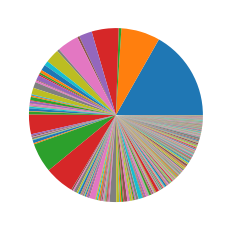

In [646]:
plt.pie(number_of_stocks["Stock count"]);

### What's the initial value of our portfolio and the final one?

In [481]:
def compute_portfolio_for_date(date, portfolio):
    prices = avg_price.loc[date]
    return portfolio.apply(lambda x: prices[x["Symbol"]] * x["Stock count"], axis=1).sum()

In [483]:
date_from, date_to

('2002-01-22', '2022-05-17')

In [482]:
compute_portfolio_for_date(date_from, number_of_stocks), compute_portfolio_for_date(date_to, number_of_stocks)

(1000.0000000000001, 6647.048086652489)

### Visualize the growth

In [484]:
dates = stock_history_big_index.index[::30]
portfolio_value = dates.map(lambda x: compute_portfolio_for_date(x, number_of_stocks))

In [485]:
import matplotlib.pyplot as plt

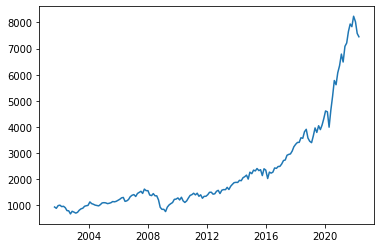

In [486]:
plt.plot(dates, portfolio_value)

In [487]:
nasdaq_index_costs = pd.concat([money_to_be_spent_on_company], axis=1, keys=["Cost"]).reset_index().rename(columns={"index": "Symbol"})

In [488]:
dates = all_nasdaq.index
dates

DatetimeIndex(['1973-02-21', '1973-02-22', '1973-02-23', '1973-02-26',
               '1973-02-27', '1973-02-28', '1973-03-01', '1973-03-02',
               '1973-03-05', '1973-03-06',
               ...
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', name='Date', length=12432, freq=None)

In [489]:
def build_graph_given_distribution(distribution, how_long_ago, dates_selector):
    date_from = all_nasdaq_2000.index[-how_long_ago]
    # print("Date from", date_from)
    price_from = avg_price.loc[date_from]
    portfolio = pd.concat([distribution["Symbol"], distribution.apply(lambda s: s["Cost"] / price_from[s["Symbol"]], axis=1)], axis=1, keys=["Symbol", "Stock count"])
    selected_dates = dates_selector(dates[-how_long_ago:])
    portfolio_values = pd.Series(selected_dates.map(lambda x: compute_portfolio_for_date(x, portfolio)))
    return selected_dates, portfolio_values

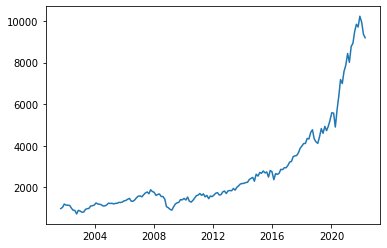

In [499]:
dates_ndq_index, values_ndq_index = build_graph_given_distribution(nasdaq_index_costs, 20 * 365 * 5 // 7, lambda x: x[::30])
plt.plot(dates_ndq_index, values_ndq_index)

In [491]:
uniform_distr = pd.concat([old_companies["Symbol"], old_companies["Symbol"].map(lambda _: budget / old_companies.shape[0])], keys=["Symbol", "Cost"], axis=1)
uniform_distr

,Symbol,Cost
0,A,2.083333
20,AAPL,2.083333
30,ABCB,2.083333
117,ACU,2.083333
126,ADBE,2.083333
...,...,...
8315,YPF,2.083333
8328,ZBRA,2.083333
8338,ZEUS,2.083333
8361,ZNH,2.083333


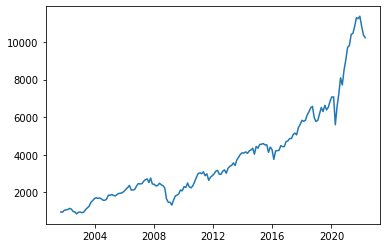

In [498]:
dates_uni_distr, values_uni_distr = build_graph_given_distribution(uniform_distr, 20 * 365 * 5 // 7, lambda x: x[::30])
plt.plot(dates_uni_distr, values_uni_distr)

### Growth of portfolio with proportional shares

In [502]:
total_growth = values_ndq_index[len(values_ndq_index) - 1] / values_ndq_index[0]
print("Total growth:", round(total_growth, 3))
annual_growth = total_growth ** (1 / 10)
print("Annual growth:", round(annual_growth, 3))

Total growth: 9.372
Annual growth: 1.251


### Growth of portfolio with uniform shares

In [503]:
total_growth = values_uni_distr[len(values_uni_distr) - 1] / values_uni_distr[0]
print("Total growth:", round(total_growth, 3))
annual_growth = total_growth ** (1 / 10)
print("Annual growth:", round(annual_growth, 3))

Total growth: 10.603
Annual growth: 1.266


### How much are we earning over a period of time?

In [545]:
import seaborn as sns

def plot_investing_growth_distribution(costs_array, window):
    epoch = 19 * 365 * 5 // 7
    growths = []
    for costs in costs_array:
        for i in range(0, epoch - window, 8):
            dates_rr, values_rr = build_graph_given_distribution(costs, i + window + 1, lambda dates: pd.Series([dates[0], dates[window]]))
            # print("From", dates_rr[0], "to", dates_rr[1], "grew from", values_rr[0], "to", values_rr[1])
            gr = (values_rr[1] / values_rr[0]) ** (1 / window * (365 * 5 / 7))
            growths.append(gr)
    growths.sort()
    # q = len(growths) // 6
    # growths = growths[q:-q]
    return growths

In [546]:
inflation = 1.03

In [622]:
import scipy.stats.mstats as mstats

### 8 years NASDAQ index

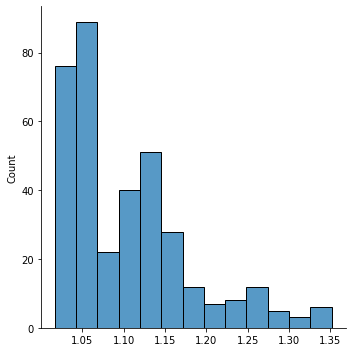

In [547]:
gr_nq_8 = plot_investing_growth_distribution([nasdaq_index_costs], 8 * 365 * 5 // 7)
sns.displot(gr_nq_8)

#### How likely to outperform saving in cash?

In [623]:
prob_nq_8 = len(list(filter(lambda x: x > inflation, gr_nq_8))) / len(gr_nq_8)
print("Probabily that saving in cash is outperformed:", round(prob_nq_8, 3))
print("Average growth:", mstats.gmean(gr_nq_8))

Probabily that saving in cash is outperformed: 0.958
Average growth: 1.1021939854857328


### 3 years NASDAQ index

C:\Users\goose\AppData\Local\Temp/ipykernel_48428/3058413756.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gr = (values_rr[1] / values_rr[0]) ** (1 / window * (365 * 5 / 7))


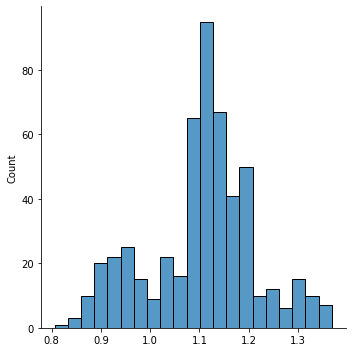

In [549]:
gr_nq_3 = plot_investing_growth_distribution([nasdaq_index_costs], 3 * 365 * 5 // 7)
sns.displot(gr_nq_3)

#### How likely to outperform saving in cash?

In [628]:
import math
prob_nq_3 = len(list(filter(lambda x: x > inflation, gr_nq_3))) / len(gr_nq_3)
print("Probabily that saving in cash is outperformed:", round(prob_nq_3, 3))
gr_nq_3_no_nan = list(filter(lambda x: not math.isnan(x), gr_nq_3))
print("Average growth:", mstats.gmean(gr_nq_3_no_nan))

Probabily that saving in cash is outperformed: 0.789
Average growth: 1.0990493361347755


#### 1/2 year NASDAQ index

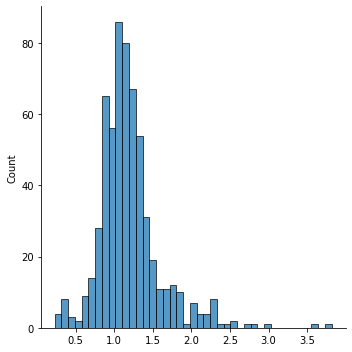

In [551]:
gr_nq_05 = plot_investing_growth_distribution([nasdaq_index_costs], 3 * 365 * 5 // 7 // 6)
sns.displot(gr_nq_05)

#### How likely to outperform saving in cash?

In [629]:
prob_nq_05 = len(list(filter(lambda x: x > inflation, gr_nq_05))) / len(gr_nq_05)
print("Probabily that saving in cash is outperformed:", round(prob_nq_05, 3))
gr_nq_05_no_nan = list(filter(lambda x: not math.isnan(x), gr_nq_05))
print("Average growth:", mstats.gmean(gr_nq_05_no_nan))

Probabily that saving in cash is outperformed: 0.668
Average growth: 1.1296892183620093


### 8 years uniform index

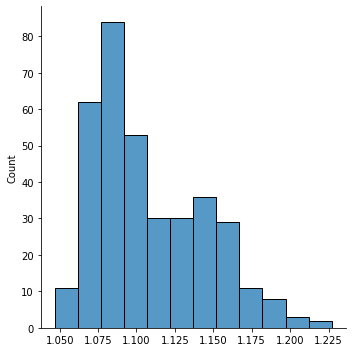

In [553]:
gr_up_8 = plot_investing_growth_distribution([uniform_distr], 8 * 365 * 5 // 7)
sns.displot(gr_up_8)

#### How likely to outperform saving in cash?

In [631]:
prob_up_8 = len(list(filter(lambda x: x > inflation, gr_up_8))) / len(gr_up_8)
print("Probabily that saving in cash is outperformed:", round(prob_up_8, 3))
gr_up_8_no_nan = list(filter(lambda x: not math.isnan(x), gr_up_8))
print("Average growth:", mstats.gmean(gr_up_8_no_nan))

Probabily that saving in cash is outperformed: 1.0
Average growth: 1.1077739111442202


### 3 years uniform index

C:\Users\goose\AppData\Local\Temp/ipykernel_48428/3058413756.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gr = (values_rr[1] / values_rr[0]) ** (1 / window * (365 * 5 / 7))


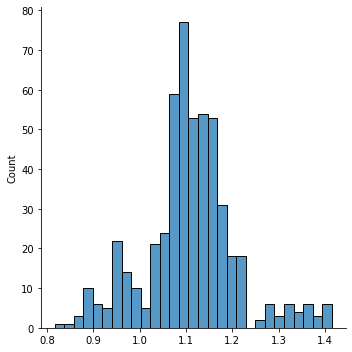

In [555]:
gr_up_3 = plot_investing_growth_distribution([uniform_distr], 3 * 365 * 5 // 7)
sns.displot(gr_up_3)

#### How likely to outperform saving in cash?

In [632]:
prob_up_3 = len(list(filter(lambda x: x > inflation, gr_up_3))) / len(gr_up_3)
print("Probabily that saving in cash is outperformed:", round(prob_up_3, 3))
gr_up_3_no_nan = list(filter(lambda x: not math.isnan(x), gr_up_3))
print("Average growth:", mstats.gmean(gr_up_3_no_nan))

Probabily that saving in cash is outperformed: 0.837
Average growth: 1.1037990936728446


### 1/2 year uniform index

In [557]:
uniform_distr

,Symbol,Cost
0,A,2.083333
20,AAPL,2.083333
30,ABCB,2.083333
117,ACU,2.083333
126,ADBE,2.083333
...,...,...
8315,YPF,2.083333
8328,ZBRA,2.083333
8338,ZEUS,2.083333
8361,ZNH,2.083333


Average growth: 1.1411038679049517


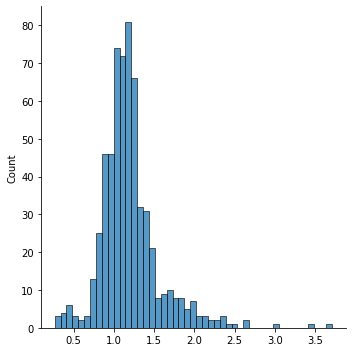

In [633]:
gr_up_05 = plot_investing_growth_distribution([uniform_distr], 3 * 365 * 5 // 7 // 6)
sns.displot(gr_up_05)

#### How likely to outperform saving in cash?

In [634]:
prob_up_05 = len(list(filter(lambda x: x > inflation, gr_up_05))) / len(gr_up_05)
print("Probabily that saving in cash is outperformed:", round(prob_up_05, 3))
gr_up_05_no_nan = list(filter(lambda x: not math.isnan(x), gr_up_05))
print("Average growth:", mstats.gmean(gr_up_05_no_nan))

Probabily that saving in cash is outperformed: 0.692
Average growth: 1.1411038679049517


## Uniform Partial index
Take N random companies and invest the same amount of money into them

In [638]:
N = 20
uniform_distr_partial = pd.concat([old_companies["Symbol"], old_companies["Symbol"].map(lambda _: budget / N)], keys=["Symbol", "Cost"], axis=1)
uniform_distr_partial.sample(n=N)

,Symbol,Cost
4286,KEP,50.0
30,ABCB,50.0
117,ACU,50.0
1802,CNX,50.0
6940,SLGN,50.0
3728,HQH,50.0
2985,FR,50.0
2075,CXH,50.0
1717,CLWT,50.0
413,AMAT,50.0


In [639]:
uniform_distr_partial_array = [uniform_distr_partial.sample(n=N) for i in range(100)]

### 8 year Uniform partial index

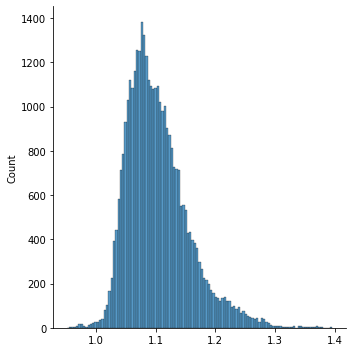

In [640]:
growths_uni_partial_8 = plot_investing_growth_distribution(uniform_distr_partial_array, 8 * 365 * 5 // 7)
sns.displot(growths_uni_partial_8)

#### How likely to outperform saving in cash?

In [641]:
prob_8 = len(list(filter(lambda x: x > inflation, growths_uni_partial_8))) / len(growths_uni_partial_8)
print("Probabily that saving in cash is outperformed:", round(prob_8, 3))
growths_uni_partial_8_no_nan = list(filter(lambda x: not math.isnan(x), growths_uni_partial_8))
print("Average growth:", mstats.gmean(growths_uni_partial_8_no_nan))

Probabily that saving in cash is outperformed: 0.973
Average growth: 1.1024118089392492


### 3 year Uniform partial index

C:\Users\goose\AppData\Local\Temp/ipykernel_48428/3058413756.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gr = (values_rr[1] / values_rr[0]) ** (1 / window * (365 * 5 / 7))


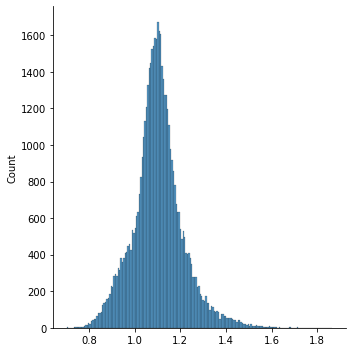

In [642]:
growths_uni_partial_3 = plot_investing_growth_distribution(uniform_distr_partial_array, 3 * 365 * 5 // 7)
sns.displot(growths_uni_partial_3)

#### How likely to outperform saving in cash?

In [643]:
prob_3 = len(list(filter(lambda x: x > inflation, growths_uni_partial_3))) / len(growths_uni_partial_3)
print("Probabily that saving in cash is outperformed:", round(prob_3, 3))
growths_uni_partial_3_no_nan = list(filter(lambda x: not math.isnan(x), growths_uni_partial_3))
print("Average growth:", mstats.gmean(growths_uni_partial_3_no_nan))

Probabily that saving in cash is outperformed: 0.787
Average growth: 1.097938419107811


### 1/2 years Uniform partial index

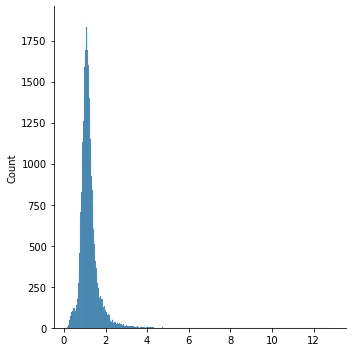

In [644]:
growths_uni_partial_05 = plot_investing_growth_distribution(uniform_distr_partial_array, 3 * 365 * 5 // 7 // 6)
sns.displot(growths_uni_partial_05)

#### How likely to outperform saving in cash?

In [645]:
prob_05 = len(list(filter(lambda x: x > inflation, growths_uni_partial_05))) / len(growths_uni_partial_05)
print("Probabily that saving in cash is outperformed:", round(prob_05, 3))
growths_uni_partial_05_no_nan = list(filter(lambda x: not math.isnan(x), growths_uni_partial_05))
print("Average growth:", mstats.gmean(growths_uni_partial_05_no_nan))

Probabily that saving in cash is outperformed: 0.66
Average growth: 1.1343710590764124


## Conclusion

If for some reason you cannot or don't want to buy ETFs, and want individual shares, but more or less reliable, you can start by investing into 5-10 *random* companies with the same amount of money.

### Summary

| Strategy    | Rel. 1/2 year | Rel. 3 years | Rel. 8 years | Growth  |
|:-----------:|:---------|:--------|:--------|:---------|
| Nq 400      | .668     | .789    | .958    | .10-.13  |
| U 400       | .692     | .837    | 1.0     | .10-.14  |
| UP 20       | .679     | .799    | .965    | .10-.13  |
| UP 5        | .617     | .716    | .826    | .09-.13  |

#### Strategy

- Nq - propotional (Nasdaq index)
- U - uniform 
- UP - Uniform partial (the number of stocks specified)

#### Reliability

The probability that the given strategy will result in portfolio worth less in given number of years than it was with the inflation adjusted.

#### Growth

Average annual growth
